# Introduction to Convolutional Neural Network

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

^C


## Inspect the data

In [3]:
# !dir pizza_steak
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!cd pizza_steak/train

In [4]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
import pathlib
import  numpy as np
data_dir= pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape:{img.shape}")
    return img

['2707522.jpg']
Image shape:(512, 512, 3)
['715169.jpg']
Image shape:(512, 512, 3)


(512, 512, 3)

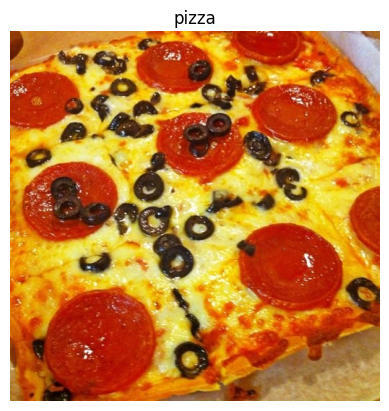

In [7]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="steak")

# !pip install matplotlib

img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

import tensorflow as tf
tf.constant(img)

img/255. # converting data to normalization

img.shape

In [8]:
## An end to end example

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
tf.random.set_seed(42)

train_datagen=ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir ="pizza_steak/train"
test_dir ="pizza_steak/test"
es = EarlyStopping(monitor='loss', patience=10)
train_data= train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data= valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

# Build a CNN Model
model_1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(filters=100, 
                                kernel_size=3,
                                activation='relu',
                                input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding="valid"),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data),callbacks=[es])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 341ms/step - loss: 0.6480 - accuracy: 0.6185 - val_loss: 0.4886 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.5058 - accuracy: 0.7864 - val_loss: 0.3955 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4347 - accuracy: 0.8103 - val_loss: 0.3822 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3912 - accuracy: 0.8395 - val_loss: 0.4110 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3238 - accuracy: 0.8692 - val_loss: 0.3676 - val_accuracy: 0.8420


['503589.jpg']
Image shape:(384, 512, 3)
['2456207.jpg']
Image shape:(384, 512, 3)


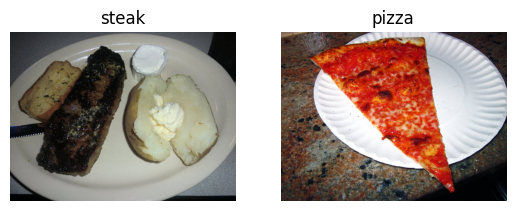

In [9]:
# Visualize datta
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

In [10]:
train_dir ="pizza_steak/train/"
test_dir = "pizza_steak/test/"


Our next step is to turn our data into ***batches***
a batch is a small subset of data rather than look at all 100000 images at one timea  model might only look at 32 at a time
it does this for a couple of reasons
1. 10000 images might be more  might not fit into the memory of your processor
2. trying to learn the pattern in 10000 images in one hit could result in the model not being able to learn very well

we split data into batchges of 32

why 32???

Because 32 is bestttt


In [11]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [12]:
train_data = train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
images, labels =train_data.next()
len(images),len(labels)

(32, 32)

In [14]:
images[:2],images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [14]:
images[7].shape

(224, 224, 3)

In [15]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

# Create a CNN Model

A base line is a relatively simple model or existing result that you setup when beginning a machine experimenting, you try to beat the baseline


In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential



In [16]:
model_4 = Sequential(
    [
        Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",activation='relu',input_shape=(224,224,3)),
        Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",activation='relu',input_shape=(224,224,3)),
        Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",activation='relu',input_shape=(224,224,3)),
Flatten(),
Dense(1,activation="sigmoid")
    ]
)

In [28]:
model_4.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [29]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_1 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [30]:
history_4=model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 113ms/step - loss: 0.2006 - accuracy: 0.9353 - val_loss: 0.6207 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.6398 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.6410 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6850 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.6911 - val_accuracy: 0.8260


In [31]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 79ms/step - loss: 0.3676 - accuracy: 0.8420


[0.3675503432750702, 0.8420000076293945]

In [32]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 79ms/step - loss: 0.6911 - accuracy: 0.8260


[0.691140353679657, 0.8259999752044678]

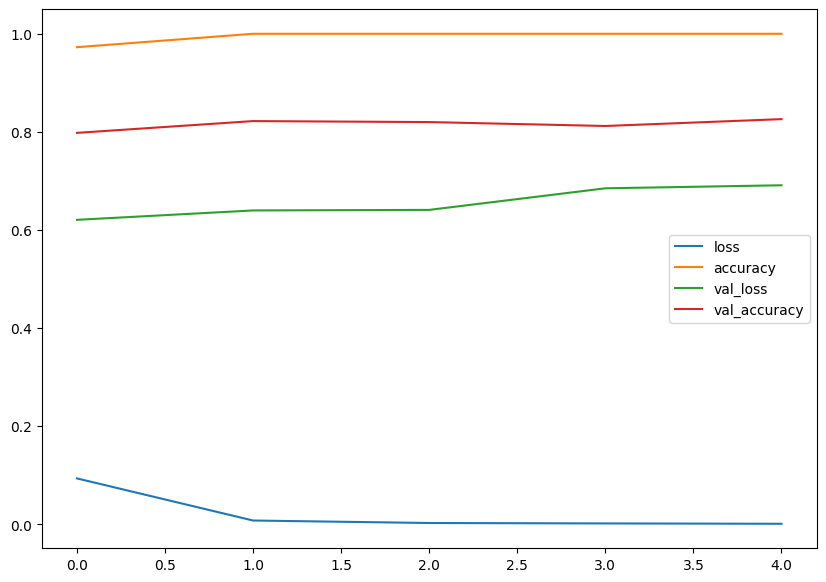

In [33]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [37]:
# plot validation and training curves seperately
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss =  history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    

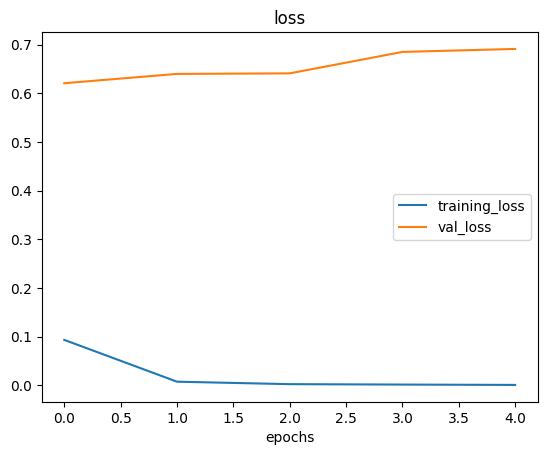

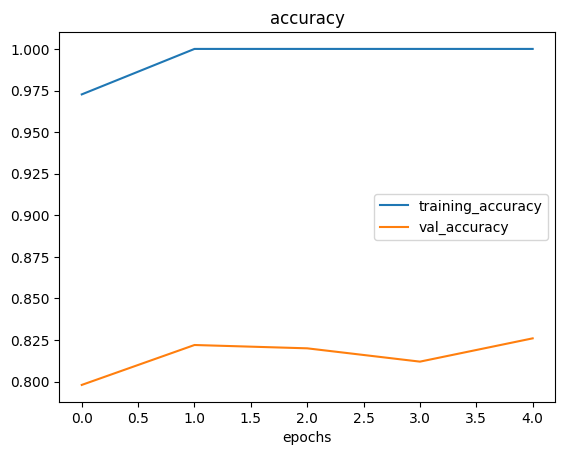

In [38]:
plot_loss_curves(history_4)

In [45]:
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2) ,
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])

In [46]:
model_5.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [47]:
history_5=  model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6473 - accuracy: 0.5952 - val_loss: 0.4510 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4557 - accuracy: 0.8006 - val_loss: 0.3906 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4283 - accuracy: 0.8138 - val_loss: 0.3785 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3951 - accuracy: 0.8280 - val_loss: 0.3294 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3377 - accuracy: 0.8628 - val_loss: 0.3257 - val_accuracy: 0.8820


In [48]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6760)             

In [50]:
model_5.evaluate(test_data)

16/16 [==============================] - 1s 82ms/step - loss: 0.3257 - accuracy: 0.8820


[0.3256611227989197, 0.8820000290870667]

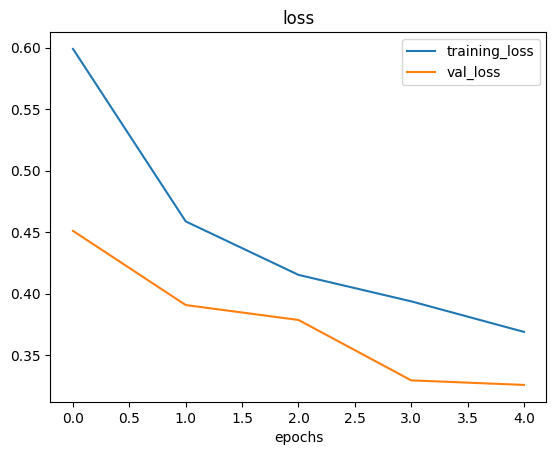

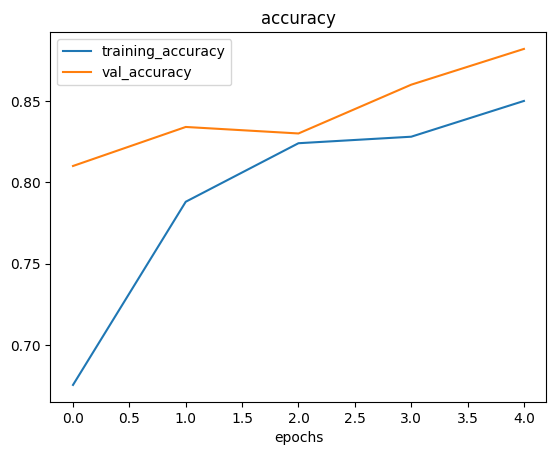

In [51]:
plot_loss_curves(history_5)